# EDA ENFRENTAMIENTOS MARVEL Y DC

Bibliotecas

In [13]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import modulo_toolbox as mtb
import toolbox_ML as tb


## DATASET MCU VS DC

#### Objetivos

**Principal**

Determinar las caracteristicas y factores clave que influyen en la victoria de un heroe en enfrentamientos, tanto en comics como en peliculas. 

**Secundarios** 
1. Analizar las diferencias en atributos (inteligencia, fuerza, durabilidad, poder y combate) entre los heroes ganadores y perdedores. 
2. Explorar como las caracteristicas del heroe (atributos y superpoderes) afectan a la probabilidad de ganar en comics y peliculas. 
3. Investigar si existen patrones o correlaciones significativas entre los atributos de los heroes y el resultado de sus enfrentamientos. 
4. Comparar las diferencias entre los resultados de enfrentamientos en comics y en peliculas 

#### Cargar data y primeras visualizaciones

In [2]:
# Cargar Data_final_comics_peliculas
df_comics_pelis = pd.read_csv('./data/Data_final_comics_peliculas.csv')

In [3]:
df_comics_pelis.head()

,Heroe 1,universo_1,Intelligence_1,Strength_1,Speed_1,Durability_1,Power_1,Combat_1,Tier_1,Tier2_1,...,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,superpoderes_2,Ganador,Resultado Comics,Resultado Peliculas
0,Aquaman,DC Extended Universe,65,50,25,30,45,80,3,NaN,...,50,50,70,100,4,4,"['Accelerated Healing', 'Chain Manipulation', ...",0,1,2
1,Aquaman,DC Extended Universe,65,50,25,30,45,80,3,NaN,...,25,25,40,20,2,NaN,"['Jaw Strength', 'Large Size', 'Size Changing'...",0,2,1
2,Aquaman,DC Extended Universe,65,50,25,30,45,80,3,NaN,...,11,15,20,95,1,NaN,"['Bloodlust', 'Dexterity', 'Disguise Mastery',...",2,2,2
3,Aquaman,DC Extended Universe,65,50,25,30,45,80,3,NaN,...,75,45,75,75,3,3,"['Afterimage Creation', 'Agility', 'Cold Resis...",2,2,2
4,Aquaman,DC Extended Universe,65,50,25,30,45,80,3,NaN,...,6,5,35,40,1,NaN,"['Stamina', 'Singing', 'Sonic Scream', 'Stealt...",1,1,1


In [4]:
df_comics_pelis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30628 entries, 0 to 30627
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heroe 1              30628 non-null  object
 1   universo_1           30628 non-null  object
 2   Intelligence_1       30628 non-null  int64 
 3   Strength_1           30628 non-null  int64 
 4   Speed_1              30628 non-null  object
 5   Durability_1         30628 non-null  int64 
 6   Power_1              30628 non-null  int64 
 7   Combat_1             30628 non-null  int64 
 8   Tier_1               30628 non-null  int64 
 9   Tier2_1              5853 non-null   object
 10  superpoderes_1       30628 non-null  object
 11  Heroe 2              30628 non-null  object
 12  universo_2           30628 non-null  object
 13  Intelligence_2       30628 non-null  int64 
 14  Strength_2           30628 non-null  int64 
 15  Speed_2              30628 non-null  object
 16  Dura

In [5]:
df_comics_pelis.value_counts()

Heroe 1         universo_1                 Intelligence_1  Strength_1  Speed_1  Durability_1  Power_1  Combat_1  Tier_1  Tier2_1  superpoderes_1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [6]:
df_comics_pelis.columns

Index(['Heroe 1', 'universo_1', 'Intelligence_1', 'Strength_1', 'Speed_1',
       'Durability_1', 'Power_1', 'Combat_1', 'Tier_1', 'Tier2_1',
       'superpoderes_1', 'Heroe 2', 'universo_2', 'Intelligence_2',
       'Strength_2', 'Speed_2', 'Durability_2', 'Power_2', 'Combat_2',
       'Tier_2', 'Tier2_2', 'superpoderes_2', 'Ganador', 'Resultado Comics',
       'Resultado Peliculas'],
      dtype='object')

In [7]:
tb.describe_df(df_comics_pelis)

,Heroe 1,universo_1,Intelligence_1,Strength_1,Speed_1,Durability_1,Power_1,Combat_1,Tier_1,Tier2_1,...,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,superpoderes_2,Ganador,Resultado Comics,Resultado Peliculas
Data type,object,object,int64,int64,object,int64,int64,int64,int64,object,...,object,int64,int64,int64,int64,object,object,int64,int64,int64
Percent missing (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.890035,...,0.0,0.0,0.0,0.0,0.0,73.142223,0.0,0.0,0.0,0.0
Unique values,244,2,16,24,27,26,25,20,9,17,...,27,26,25,20,9,17,243,3,3,3
Cardinality percent (%),0.796657,0.00653,0.05224,0.07836,0.088155,0.08489,0.081625,0.0653,0.029385,0.055505,...,0.088155,0.08489,0.081625,0.0653,0.029385,0.055505,0.793392,0.009795,0.009795,0.009795


In [12]:
df_comics_pelis.describe()

,Intelligence_1,Strength_1,Durability_1,Power_1,Combat_1,Tier_1,Intelligence_2,Strength_2,Durability_2,Power_2,Combat_2,Tier_2,Ganador,Resultado Comics,Resultado Peliculas
count,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000,30628.000000
mean,66.804395,39.248368,28.096121,46.564418,63.441785,2.150157,69.606896,39.800020,31.452266,50.588808,67.122731,2.285327,0.607516,1.347688,1.350790
std,15.734024,35.728096,20.601415,28.742117,23.690754,1.493408,14.168912,34.535556,21.772055,28.593862,21.165447,1.551728,0.802194,0.654669,0.653237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,5.000000,10.000000,20.000000,45.000000,1.000000,60.000000,10.000000,15.000000,25.000000,55.000000,1.000000,0.000000,1.000000,1.000000
50%,65.000000,25.000000,25.000000,45.000000,70.000000,2.000000,70.000000,25.000000,25.000000,50.000000,70.000000,2.000000,0.000000,1.000000,1.000000
75%,75.000000,75.000000,40.000000,70.000000,80.000000,3.000000,80.000000,75.000000,45.000000,75.000000,85.000000,3.000000,1.000000,2.000000,2.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000,8.000000,2.000000,2.000000,2.000000


Limpieza datos y tratamiento nulos 

In [46]:
df_comics_pelis['Tier2_2'].value_counts()

Tier2_2
0    26881
4     1393
3     1040
1      586
2      400
5      167
8      161
Name: count, dtype: int64

In [9]:
# Tratamiento nulos
df_comics_pelis['Tier2_1'] = df_comics_pelis['Tier2_1'].fillna(0)
df_comics_pelis['Tier2_2'] = df_comics_pelis['Tier2_2'].fillna(0)


In [15]:
df_comics_pelis['Speed_2'].value_counts()

Speed_2
25     11110
20      2287
6       1747
8       1689
11      1586
50      1513
1       1445
100     1288
14      1073
17       983
30       962
7        932
85       816
35       625
19       514
80       291
70       261
10       220
75       211
0        205
15       201
65       161
13       144
95       117
60       117
∞        111
45        19
Name: count, dtype: int64

In [17]:
# Transformacion columnas numericas de object a int
columns_to_convert = ['Speed_1', 'Speed_2', 'Tier2_1', 'Tier2_2'] 
df_comics_pelis[columns_to_convert] = df_comics_pelis[columns_to_convert].apply(pd.to_numeric, errors = 'coerce').fillna(0).astype(int)

In [18]:
df_comics_pelis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30628 entries, 0 to 30627
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Heroe 1              30628 non-null  object
 1   universo_1           30628 non-null  object
 2   Intelligence_1       30628 non-null  int64 
 3   Strength_1           30628 non-null  int64 
 4   Speed_1              30628 non-null  int32 
 5   Durability_1         30628 non-null  int64 
 6   Power_1              30628 non-null  int64 
 7   Combat_1             30628 non-null  int64 
 8   Tier_1               30628 non-null  int64 
 9   Tier2_1              30628 non-null  int32 
 10  superpoderes_1       30628 non-null  object
 11  Heroe 2              30628 non-null  object
 12  universo_2           30628 non-null  object
 13  Intelligence_2       30628 non-null  int64 
 14  Strength_2           30628 non-null  int64 
 15  Speed_2              30628 non-null  int32 
 16  Dura

In [11]:
tb.describe_df(df_comics_pelis)

,Heroe 1,universo_1,Intelligence_1,Strength_1,Speed_1,Durability_1,Power_1,Combat_1,Tier_1,Tier2_1,...,Speed_2,Durability_2,Power_2,Combat_2,Tier_2,Tier2_2,superpoderes_2,Ganador,Resultado Comics,Resultado Peliculas
Data type,object,object,int64,int64,object,int64,int64,int64,int64,object,...,object,int64,int64,int64,int64,object,object,int64,int64,int64
Percent missing (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unique values,244,2,16,24,27,26,25,20,9,18,...,27,26,25,20,9,18,243,3,3,3
Cardinality percent (%),0.796657,0.00653,0.05224,0.07836,0.088155,0.08489,0.081625,0.0653,0.029385,0.05877,...,0.088155,0.08489,0.081625,0.0653,0.029385,0.05877,0.793392,0.009795,0.009795,0.009795


In [35]:
cat_var = ['Heroe 1', 'universo_1', 'superpoderes_1', 'Heroe 2', 'universo_2', 'superpoderes_2']
num_var = ['Intelligence_1', 'Strength_1', 'Speed_1', 'Durability_1', 'Power_1', 'Combat_1', 'Tier_1', 'Tier2_1',
           'Intelligence_2', 'Strength_2', 'Speed_2', 'Durability_2', 'Power_2', 'Combat_2', 'Tier_2', 'Tier2_2',
           'Ganador', 'Resultado Comics', 'Resultado Peliculas']

#### Univariante

Numericas

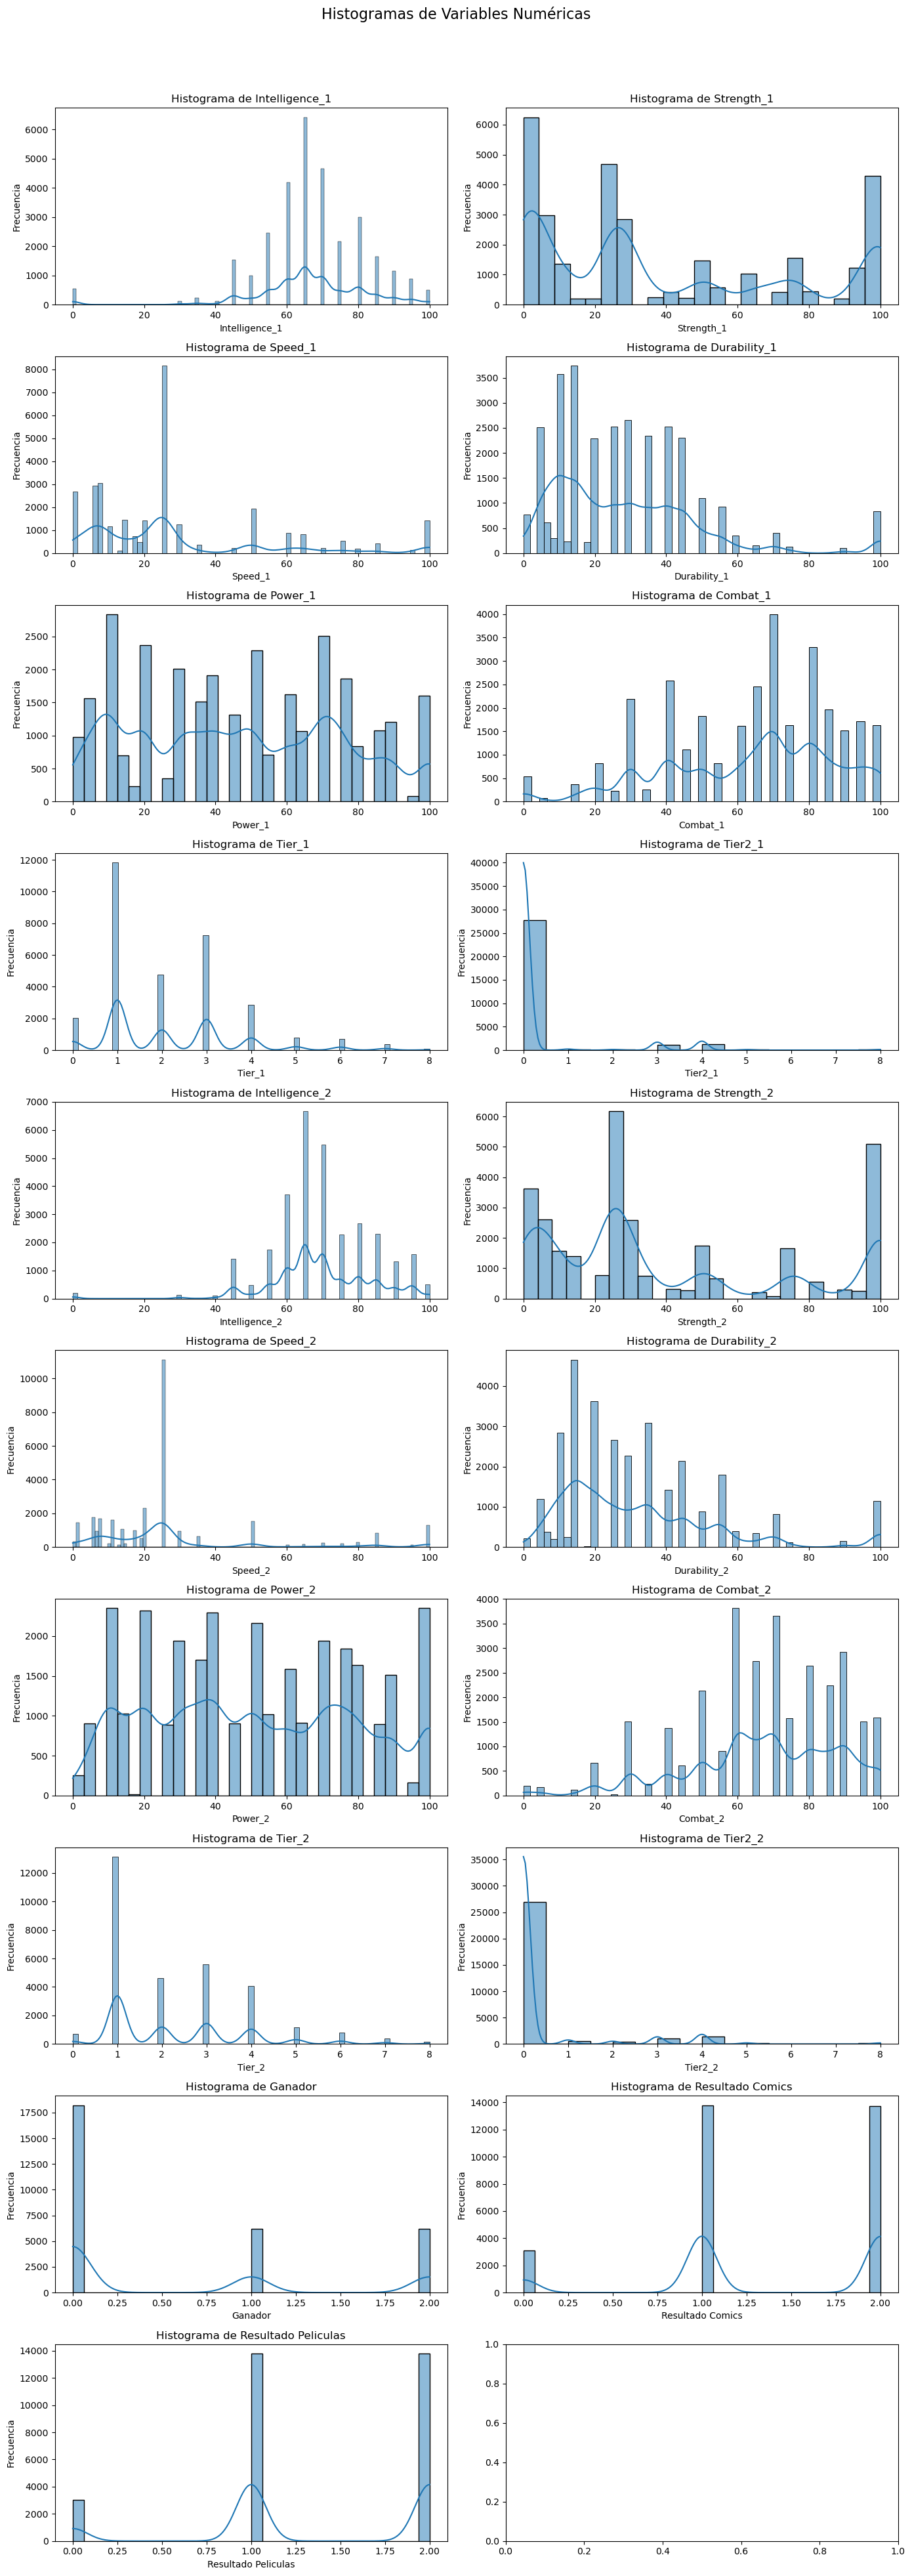

In [37]:
# Plot histogramas con variables numericas
fig, axes = plt.subplots(10, 2, figsize=(14, 40))
fig.suptitle('Histogramas de Variables Numéricas', fontsize=16)

for i, col in enumerate(num_var):
    sns.histplot(df_comics_pelis[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histograma de {col}')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


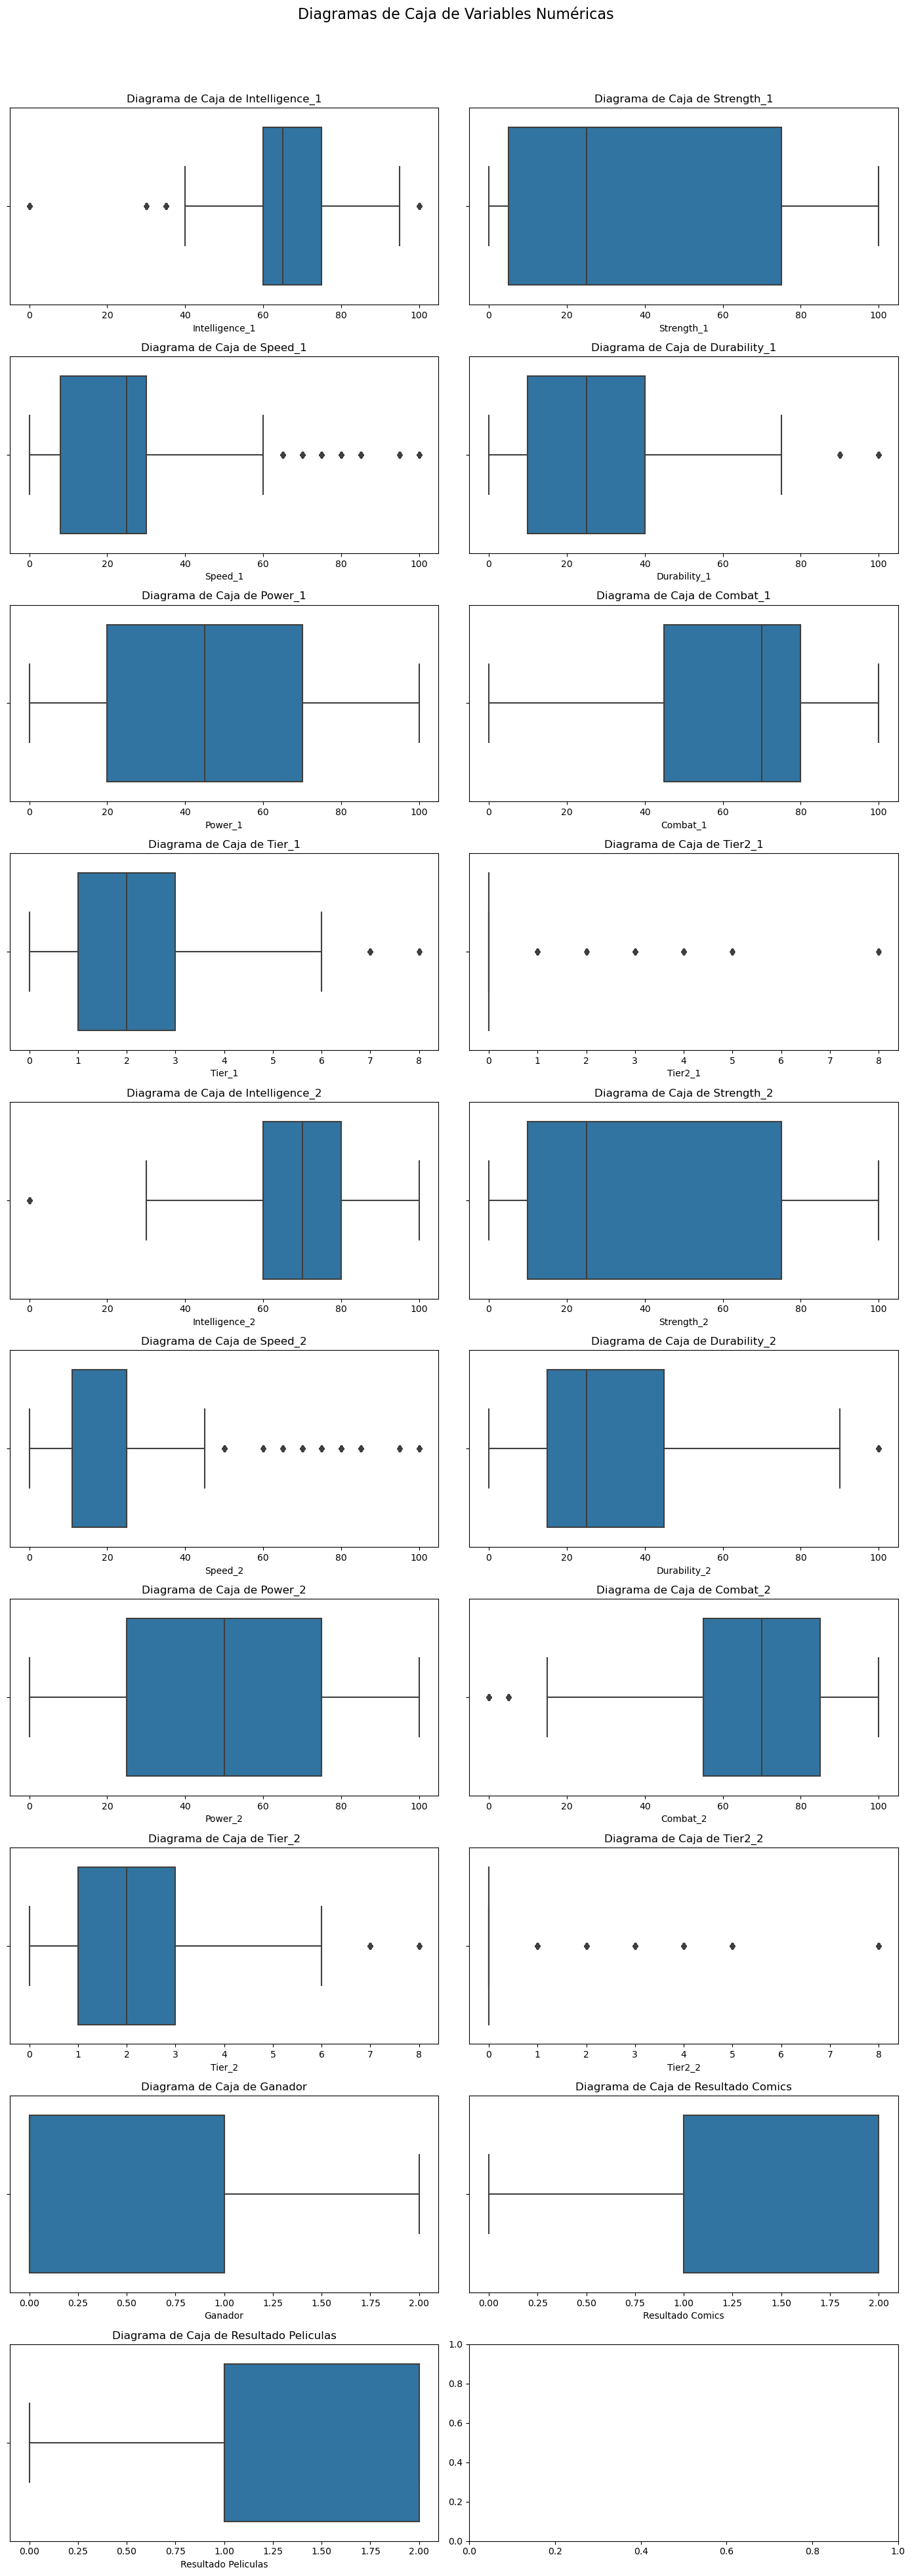

In [41]:
# Plot boxplots de las variables numericas
fig, axes = plt.subplots(10, 2, figsize=(14, 40))
fig.suptitle('Diagramas de Caja de Variables Numéricas', fontsize=16)

for i, col in enumerate(num_var):
    sns.boxplot(x=df_comics_pelis[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Diagrama de Caja de {col}')
    axes[i//2, i%2].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Categoricas

In [57]:
# Summarize value counts for categorical variables
for col in cat_var:
    print(f"Distribución de {col}:\n")
    print(df_comics_pelis[col].value_counts(), "\n")


Distribución de Heroe 1:

Heroe 1
Black Panther     321
Black Widow       317
Aquaman           247
Ares              246
Atom Smasher      245
                 ... 
Winter Soldier      5
Wolverine           4
Wong                3
YellowJacket        2
Yondu               1
Name: count, Length: 244, dtype: int64 

Distribución de universo_1:

universo_1
DC Extended Universe         15403
Marvel Cinematic Universe    15225
Name: count, dtype: int64 

Distribución de superpoderes_1:

superpoderes_1
['Acrobatics', 'Agility', 'Durability', 'Endurance', 'Energy Absorption', 'Intelligence', 'Marksmanship', 'Master Martial Artist', 'Peak Human Condition', 'Stamina', 'Stealth', 'Vision - Night', 'Accelerated Healing', 'Acid Resistants', 'Animal Oriented Powers', 'Attack Reflection', 'Camouflage', 'Cold Resistance', 'Danger Sense', 'Dexterity', 'Gadget Usage', 'Heat Resistance', 'Hunters Instinct', 'Jump', 'Longevity', 'Master Tactician', 'Preparation', 'Reflexes', 'Shockwaves Generation', 'Sw

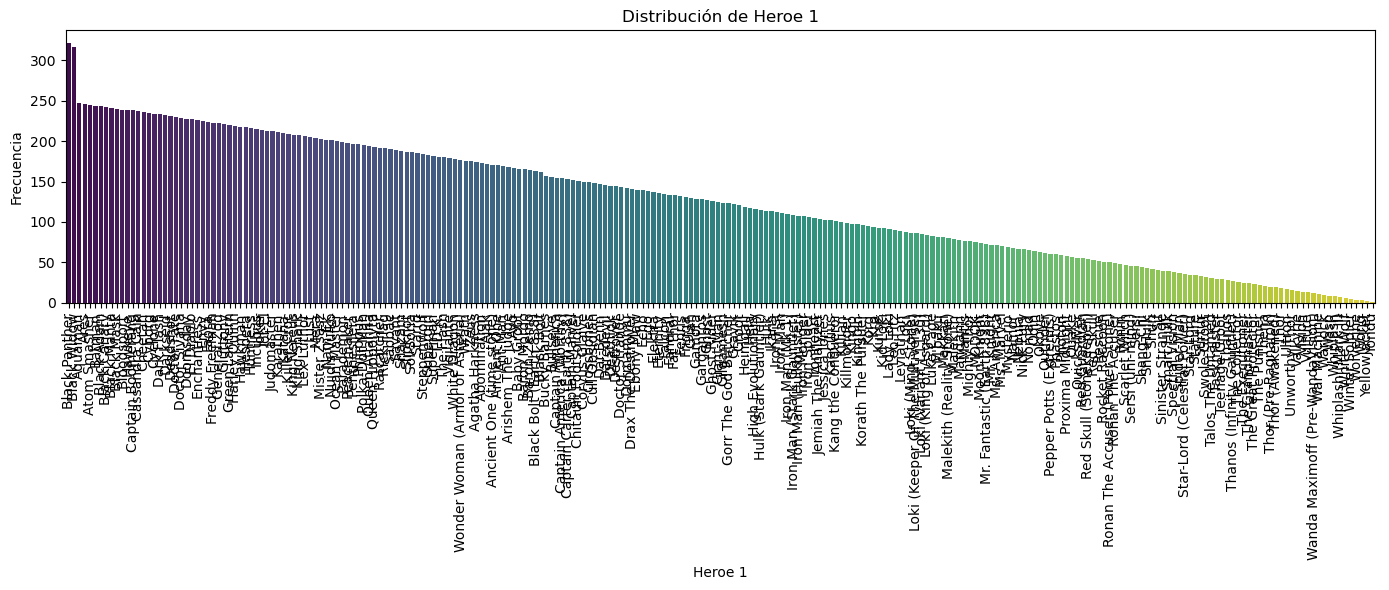

In [60]:
# Plot bar plot for 'Heroe 1'
plt.figure(figsize=(14, 6))
serie = df_comics_pelis['Heroe 1'].value_counts()
sns.barplot(x=serie.index, y=serie, palette='viridis')
plt.title('Distribución de Heroe 1')
plt.xlabel('Heroe 1')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


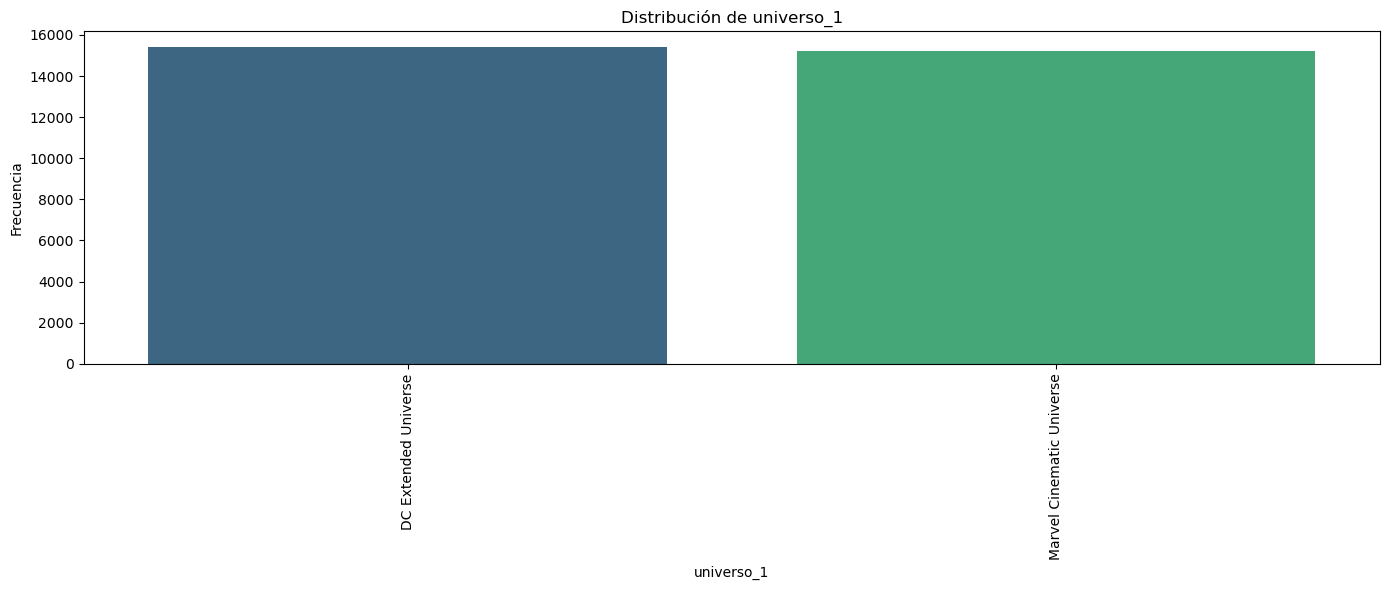

In [62]:
# Plot bar plot for 'universo_1'
plt.figure(figsize=(14, 6))
serie = df_comics_pelis['universo_1'].value_counts()
sns.barplot(x=serie.index, y=serie, palette='viridis')
plt.title('Distribución de universo_1')
plt.xlabel('universo_1')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Hipotesis

1. Los heroes con mayores atributos de fuerza y poder tiene una mayor probabilidad de ganar

2. Existe una diferencias significativa en los resultados de los enfrentamientos entre comics y peliculas 

3. Los atributos de inteligencia y combate tiene una correlacion positiva significativa con las victorias 

4. Los heroes del mismo universo tiene patrones similares de victorias y derrotas

5. Los valores atipicos (outliers) en atributos especificos tiene un impacto desproporcionado en el resutlado de los enfrentamientos 